# LASSO Analysis of Diabetes Data
## Addressing Model Selection Problems and Implementing Cross-Validation Methods
Analyze the dataset of diabetes using LASSO Regression where it adds a regularization penalty to the model. This regularization penalty is based on the L1 norm.
The key aspect of LASSO is its ability to produce sparse solutions. Many of the regression coefficients are exactly zero.

The L1 penalty is the sum of the absolute values of the coefficients, mathematically expressed as $λ ∑ | β_j |$, where $𝛽_j$are the coefficients and $𝜆$ is a tuning parameter that controls the strength of the penalty.

Determine $𝜆$ Using K-fold Cross-Validation Methods.



Target: a quantitative measure of disease progression one year after baseline

Features: ten numeric predictive values
- age age in years
- sex, bmi body mass index
- bp average blood pressure
- s1 tc
- total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

Source URL: https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.linear_model import Lasso # module for LASSO
from sklearn.preprocessing import StandardScaler

# Read the dataset
data = datasets.load_diabetes()

# Features　(design matrix)
X = data.data
# Target
y = data.target
# feature's names
feature_names = data.feature_names

# Show the datasets
df = pd.DataFrame(X, columns = feature_names)
df['target'] = y
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [3]:
print(f'X: {X.shape}')
print(f'y: {y.shape}')

X: (442, 10)
y: (442,)


In [4]:
# Standardizing the design matrix
# In linear regression with regularization terms, standardize the design matrix to equalize the impact of regularization across all variables.
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X) #Apply the standardization transformation using mean and standard deviation in 'scale'


In [5]:
# module for Cross-Validation Methods
from sklearn.model_selection import cross_val_score


start = 3
step = 0.9
n_models = 40
# list for candidate hyperparameters
alpha_list = [start * step ** n for n in range(n_models)]

cv_score_list = []



for alpha in alpha_list:
  lasso = Lasso(alpha = alpha, fit_intercept = True)
  # cv=10 is K value in K-fold cross-validation method
  cv_score = np.mean(cross_val_score(lasso, X_scaled, y, scoring='neg_mean_squared_error', cv=10))
  # cv_score = np.mean(cross_val_score(lasso, X_scaled, y, cv=10))
  cv_score_list.append(cv_score)


k = len(cross_val_score(lasso, X_scaled, y, scoring='neg_mean_squared_error', cv=10))
print(f'numpy calculates the mean of {k} (=K) cv scores of each fold')



numpy calculates the mean of 10 (=K) cv scores of each fold


検証誤差 Validation Error　$E_{valid}(λ)$　is expressed as cross-validation score (cv_score) in this K-fold cross-validation method

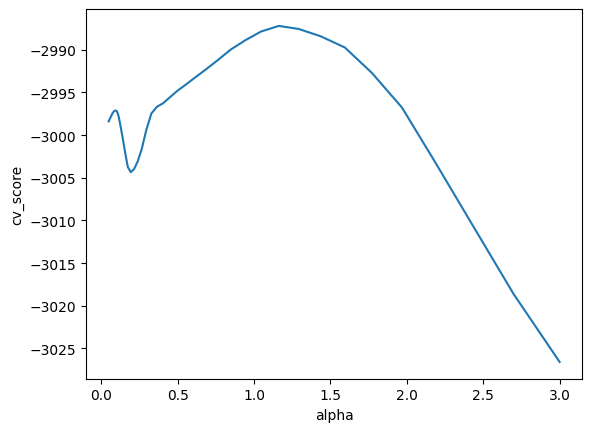

In [6]:
plt.plot(alpha_list, cv_score_list)
plt.xlabel('alpha')
plt.ylabel('cv_score')
plt.show()

In [7]:
# the index for the best alpha among 40 (n_models) candidates
index_alpha_opt = cv_score_list.index(max(cv_score_list))

print(f'Optimized alpha: {alpha_list[index_alpha_opt]:.4f}')

Optimized alpha: 1.1623


## Now you know the most optimized lasso model with the best alpha (hyperparameter) among 40 candidates

In [8]:
# Optimized LASSO model
lasso_opt = Lasso(alpha = alpha_list[index_alpha_opt], fit_intercept = True)

# Fit the dataset
lasso_opt.fit(X_scaled, y)

# Output weights
for feature in feature_names:
  index = data.feature_names.index(feature)
  coef = lasso_opt.coef_[index]
  print(f'{feature}: {coef:.2f}')

# Constant term
print(f'Intercept: {lasso_opt.intercept_:.2f}')

age: -0.00
sex: -9.04
bmi: 24.80
bp: 13.94
s1: -4.49
s2: -0.00
s3: -10.53
s4: 0.00
s5: 24.21
s6: 2.42
Intercept: 152.13


In [11]:

coefficients = {feature: lasso_opt.coef_[data.feature_names.index(feature)] for feature in feature_names}

# Add Intercept as well
coefficients['Intercept'] = lasso_opt.intercept_

# convert to dataframe of pandas
df_coefficients = pd.DataFrame([coefficients])

# show dataframe
df_coefficients

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Intercept
0,-0.0,-9.035264,24.797457,13.940894,-4.494567,-0.0,-10.530467,0.0,24.214217,2.420687,152.133484


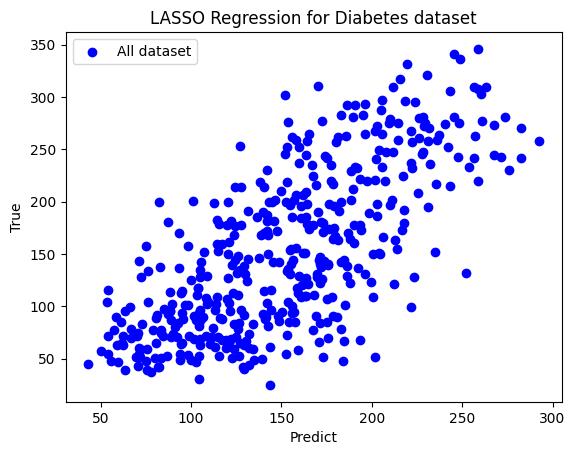

In [12]:
# Evaluate teh predictions on the test data
y_predict = lasso_opt.predict(X_scaled)

# Plot outputs
plt.scatter(y_predict, y, color="blue", label='All dataset')


plt.title('LASSO Regression for Diabetes dataset')
plt.xlabel('Predict')
plt.ylabel('True')
plt.legend()
plt.show()